Use a Convolutional Neural Net to classify the MNIST data of digits

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-04-12 11:22:17.196611: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-12 11:22:17.227850: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [4]:
# Reshape the images into 4D arrays for use with a CNN
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [5]:
# Convert the labels into one-hot encoded arrays
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
# Define the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [7]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# Train the model and record the history, the data is split in batches
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 15s 16ms/step - loss: 0.1726 - accuracy: 0.9475 - val_loss: 0.0646 - val_accuracy: 0.9796
Epoch 2/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0538 - accuracy: 0.9837 - val_loss: 0.0411 - val_accuracy: 0.9858
Epoch 3/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0381 - accuracy: 0.9883 - val_loss: 0.0350 - val_accuracy: 0.9887
Epoch 4/10
938/938 [==============================] - 14s 15ms/step - loss: 0.0295 - accuracy: 0.9906 - val_loss: 0.0418 - val_accuracy: 0.9865
Epoch 5/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.0299 - val_accuracy: 0.9896
Epoch 6/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0181 - accuracy: 0.9941 - val_loss: 0.0341 - val_accuracy: 0.9894
Epoch 7/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0146 - accuracy: 0.9955 - val_loss: 0.0271 - val_accuracy:

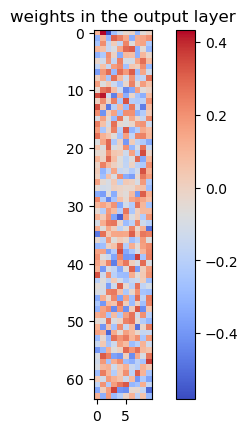

In [9]:
# Get the weights of the Dense layer
# plot the weights as a heatmap or image, where the weights are represented
# as pixel values.
last_layer_weights = model.layers[-1].get_weights()[0]
# Plot the weights as a heatmap
plt.imshow(last_layer_weights, cmap='coolwarm')
plt.colorbar()
plt.title('weights in the output layer')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


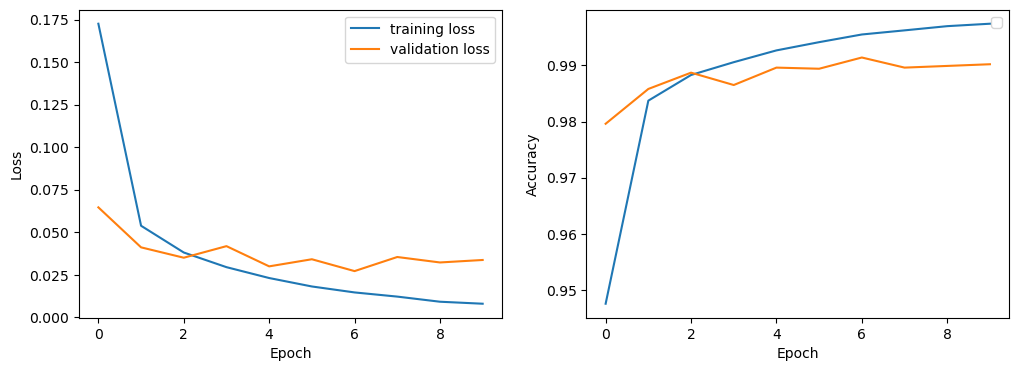

In [10]:
# Plot loss and accuracy
plt.figure(figsize=(12, 4))

# Plot the loss during training
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

313/313 [==============================] - 1s 2ms/step


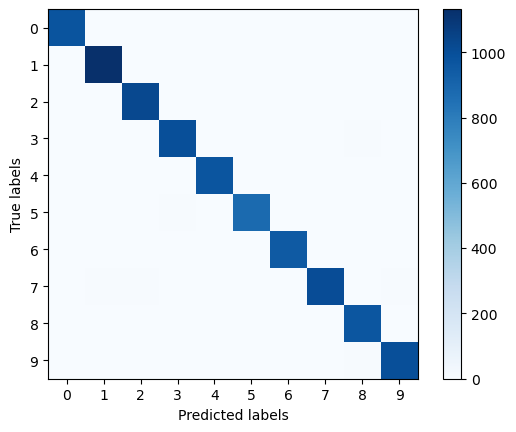

In [11]:
# Plot a confusion matrix of the test set predictions
test_preds = np.argmax(model.predict(x_test), axis=1)
conf_mat = tf.math.confusion_matrix(y_test.argmax(axis=1), test_preds)

plt.imshow(conf_mat, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.colorbar()
plt.show()

In [12]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0337 - accuracy: 0.9902
Test accuracy: 0.9901999831199646


In [13]:
# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


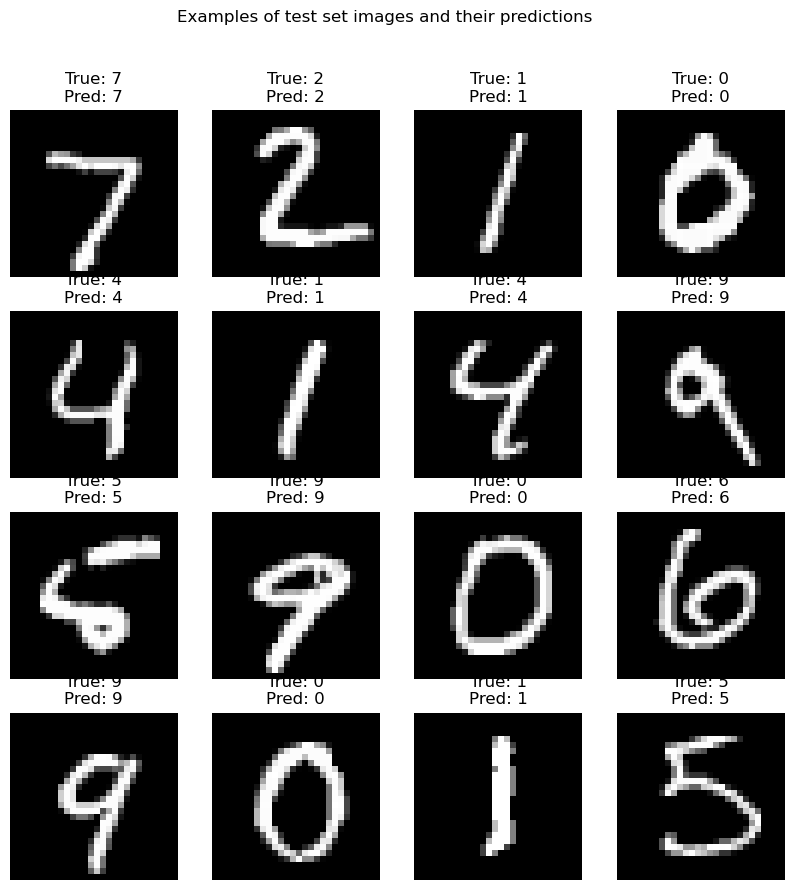

In [14]:
# Plot some examples from the test set and their predictions
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title("True: %d\nPred: %d" % (np.argmax(y_test[i]), y_pred[i]))
    ax.axis('off')
plt.suptitle("Examples of test set images and their predictions")
plt.show()
